<a href="https://colab.research.google.com/github/mnazizi/Ai/blob/main/gradient_decent_for_linear_and_polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

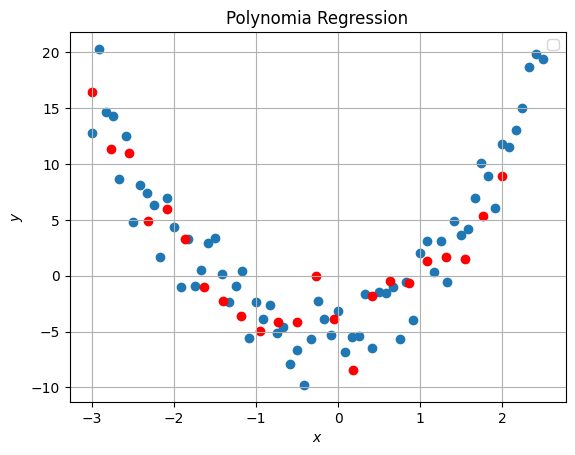

12.737802456099526
-3.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
x = np.linspace(-3 , 2.5, 67)
x_test = np.linspace(-3 ,2 , 23)

n = len(x)
y = 3*x**2 + 2*x -5 + np.random.normal(0,2,n)
y_test = 3*x_test**2 + 2*x_test -5 + np.random.normal(0,2,len(x_test))
#y =8*x -5 + np.random.normal(0,5,n)
#y_test =8*x_test -5 + np.random.normal(0,5,len(x_test))
#y = np.sin(x) + np.random.normal(0,0.1,n)
#y_test = np.sin(x_test) + np.random.normal(0,0.1,17)
plt.scatter(x,y)
plt.scatter(x_test,y_test , color = "red")
plt.legend()
plt.grid(True)
plt.title("Polynomia Regression")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.grid(True)
plt.show()
print(y[0])
print(x[0])


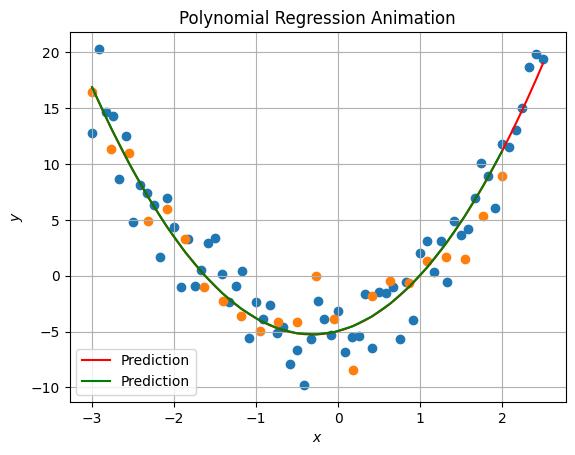

Epoch : 99999 , Loss : 6.081694878730943e-17
W0 : -4.964451365283334 , W1 : 1.9186161972863318 , W2 : 3.0657479549386597


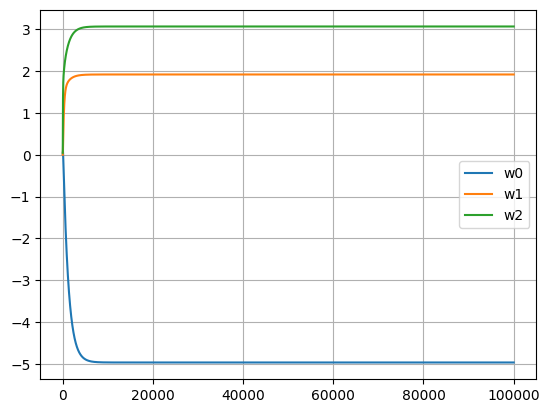

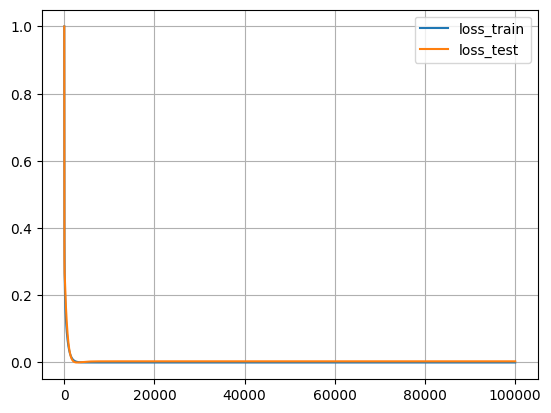

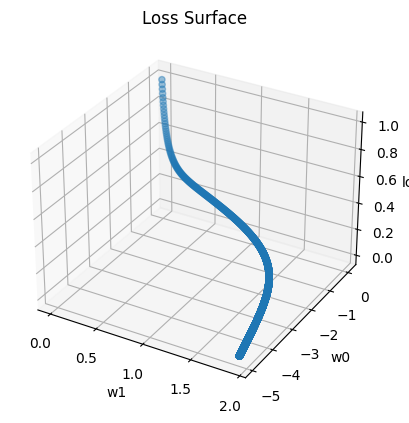

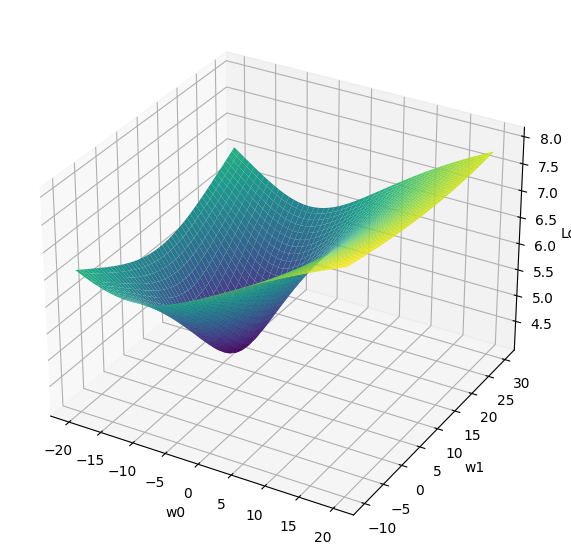

In [4]:
def gradien(w2,w1 , w0 , x , y):
    yh = w2*x**2 + w1*x + w0
 #   yh = w1*x + w0
    err = (y-yh)**2
    dw0 = -2 * (y-yh)
    dw1 = -2 * x * (y-yh)
    dw2 = -2 * (x**2) * (y-yh)
    return dw2, dw1 , dw0 , err

dw2 , dw1 , dw0 = 0 , 0 , 0
W2 , W1 ,W0 = 0 , 0 , 0





learning_rate = 0.001
epochs =100000
LOSS = 0
w0_list = []
w1_list = []
w2_list = []
loss_list = []
loss_list_test = []
epoch_list = []
for epoch in range(epochs):
  LOSS = 0
  epoch_list.append(epoch)
  Dw2, Dw1, Dw0 , Err = 0, 0, 0 , 0
  for j in range(n):
    dw2 , dw1 , dw0 , err = gradien(W2,W1 , W0 , x[j] , y[j])
    Dw2, Dw1, Dw0 , Err = Dw2 + dw2 , Dw1 + dw1 , Dw0 + dw0 , Err + err
  W2 = W2 - learning_rate * (Dw2/n)
  W1 = W1 - learning_rate * (Dw1/n)
  W0 = W0 - learning_rate * (Dw0/n)
  LOSS = Err/n
  w0_list.append(W0)
  w1_list.append(W1)
  w2_list.append(W2)
  loss_list.append(LOSS)
  h_test = W2*x_test**2 + W1*x_test + W0
  loss_list_test.append((np.sum((h_test - y_test)**2))/n)

loss_list_normalized = (loss_list - np.min(loss_list)) / (np.max(loss_list) - np.min(loss_list))
loss_list_test_normalized = (loss_list_test - np.min(loss_list_test)) / (np.max(loss_list_test) - np.min(loss_list_test))

plt.plot(x, W2 * x**2 + W1 * x +  W0 , label = f"Prediction"  , color = "red")
plt.plot(x_test, W2 * x_test**2 + W1 * x_test +  W0 , label = f"Prediction"  , color = "green")
plt.legend()
plt.scatter(x, y)
plt.scatter(x_test, y_test)
plt.title("Polynomial Regression Animation")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.grid(True)
plt.show()

print(f"Epoch : {epoch} , Loss : {loss_list_normalized[epoch-1]}")
print(f"W0 : {W0} , W1 : {W1} , W2 : {W2}")
plt.plot(w0_list,label = "w0")
plt.plot(w1_list,label = "w1")
plt.plot(w2_list,label = "w2")
plt.legend()
plt.grid(True)
plt.show()

plt.plot(epoch_list , loss_list_normalized,label = "loss_train")
plt.plot(epoch_list , loss_list_test_normalized,label = "loss_test")
plt.legend()
plt.grid(True)
plt.show()

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import Axes3D
fig = plt.figure()  # Create a figure
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot
ax.scatter(w1_list, w0_list, loss_list_normalized)  # Plot on the 3D subplot
ax.set_xlabel('w1')
ax.set_ylabel('w0')
ax.set_zlabel('loss')
plt.title("Loss Surface")
plt.grid(True)
plt.show()

def MSE_loss(w0, w1, x, y):
    pred = w0 + w1 * x
    loss = np.sum((pred - y) ** 2) / len(y)
    return loss

w0_vals = np.linspace(-20, 20, 100*5)
w1_vals = np.linspace(-10,30, 100*5)

Z = np.zeros((len(w0_vals),len(w1_vals)))
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        Z[i, j] = np.log(MSE_loss(w0_vals[i], w1_vals[j], x, y))

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
W0M, W1M = np.meshgrid(w0_vals, w1_vals)
ax.plot_surface(W0M, W1M, Z, cmap='viridis')

# Adding labels
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('Loss')
plt.show()
